# Plotting univariate data in ggplot

Updating notebook 1 to also include `borough`.

### Python and R Setup

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart



In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Import packages in R

In [5]:
%%R

require('ggplot2')
require('readr')
require('dplyr')
require('tidyr')


Loading required package: ggplot2
Loading required package: readr
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: tidyr


### Read data

In [6]:
%%R

# Read data
df <- read_csv('housing_data.csv')
df

Rows: 189 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): borough
dbl (11): zip, population, pct_hispanic_or_latino, pct_asian, pct_american_i...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 189 × 12
     zip population borough  pct_hispanic_or_latino pct_asian
   <dbl>      <dbl> <chr>                     <dbl>     <dbl>
 1 11368     112088 QUEENS                    76.5      11.6 
 2 11385     107796 QUEENS                    45.0       6.46
 3 11211     103123 BROOKLYN                  24.1       5.53
 4 11208     101313 BROOKLYN                  40.6       6.01
 5 10467     101255 BRONX                     52.1       5.68
 6 11236     100844 BROOKLYN                   7.66      2.58
 7 11226      99558 BROOKLYN                  16.4       3.07
 8 11373      94437 QUEENS                    41.7

### Histogram

👉 Try It

Grab your histogram code from the previous exercise (or just use the sample below) 

- modify the code to plot one histogram per borough 
- add a meaningful title and subtitle and axis labels

_(hint: this may require you to look up how `facet_wrap` works)._

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


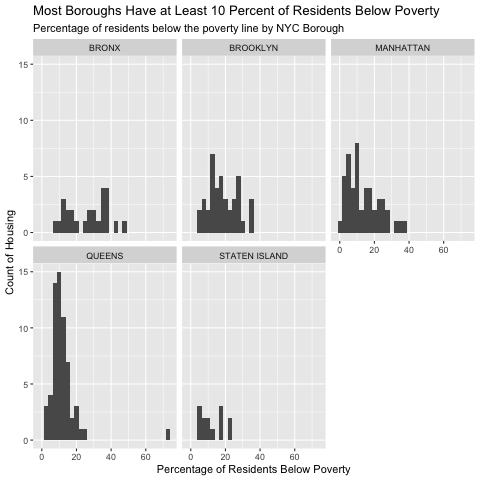

In [14]:
%%R 

ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram() + 
    facet_wrap(~borough) +
    labs(
        x = 'Percentage of Residents Below Poverty',
        y = 'Count of Housing',
        title = 'Most Boroughs Have at Least 10 Percent of Residents Below Poverty',
        subtitle = 'Percentage of residents below the poverty line by NYC Borough')

### Dotplot

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might want to change the `y` aesthetic instead of using `facet_wrap`)._

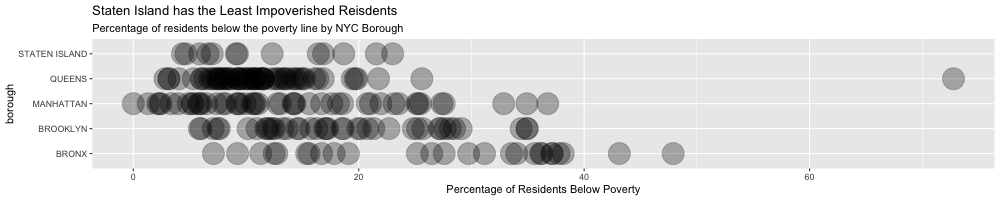

In [17]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y= borough) +
    geom_point(alpha=.3, size=10) +
    labs(
        x = 'Percentage of Residents Below Poverty',
        title = 'Staten Island has the Least Impoverished Reisdents',
        subtitle = 'Percentage of residents below the poverty line by NYC Borough')

### Dotplot (with jitter)

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might also need to mess with the y axis, but also the colors of the dots)._

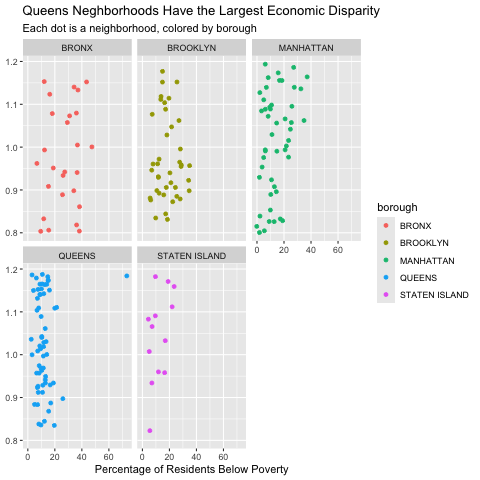

In [26]:
%%R 

ggplot(df) + 
    aes(x=pct_below_poverty, y=1, color = borough) +
    geom_jitter(height = 0.2, width = 0.5) +
    facet_wrap(~borough) + 
    labs(
        x = 'Percentage of Residents Below Poverty',
        y = NULL,
        title = 'Queens Neghborhoods Have the Largest Economic Disparity',
        subtitle = 'Each dot is a neighborhood, colored by borough')

### Density Plot

👉 Try It

Grab your density plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough


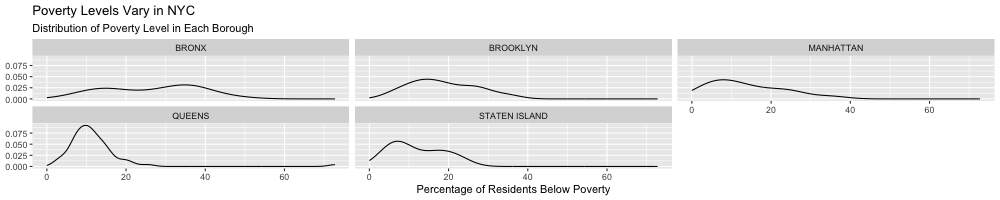

In [28]:
%%R -w 1000 -h 200
ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_density() +
    facet_wrap(~borough) + 
    labs(
        x = 'Percentage of Residents Below Poverty',
        y = NULL,
        title = 'Poverty Levels Vary in NYC',
        subtitle = 'Distribution of Poverty Level in Each Borough')

### Box and Whisker Plot
http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization



👉 Try It

Grab your box and whisker plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

👉 Bonus
- see if you can annotate the biggest oulier


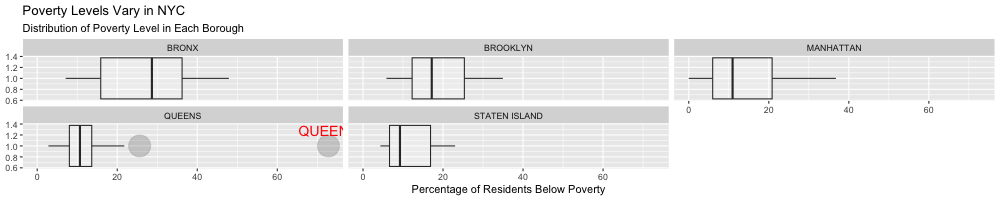

In [33]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_boxplot(alpha=.2,outlier.size=10) + 
    facet_wrap(~borough) + 
    labs(
        x = 'Percentage of Residents Below Poverty',
        y = NULL,
        title = 'Poverty Levels Vary in NYC',
        subtitle = 'Distribution of Poverty Level in Each Borough') + 
    geom_text(data = df %>% filter(pct_below_poverty == max(pct_below_poverty)), 
              aes(label = borough),
              vjust = -1, 
              color = "red", 
              size = 5)

### Violin Plot

👉 Try It

Grab your violin plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- write about how this chart looks different from the box and whisker plot and for what purpose it may be more useful
> It might be more useful if I'd like to see if there are multiple peaks, how spread-out the data is.



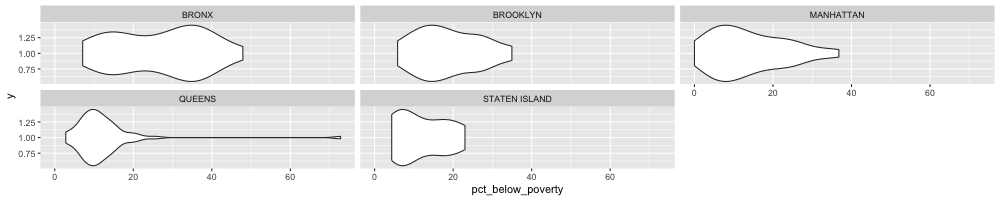

In [34]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_violin() + 
    facet_wrap(~borough)

### Beeswarm 
👉 Bonus

Grab your beeswarm code from the previous exercise

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart